In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

### Featuring model

In [4]:
# Load the dataset
data = pd.read_csv('../data/bostonhousing.csv')

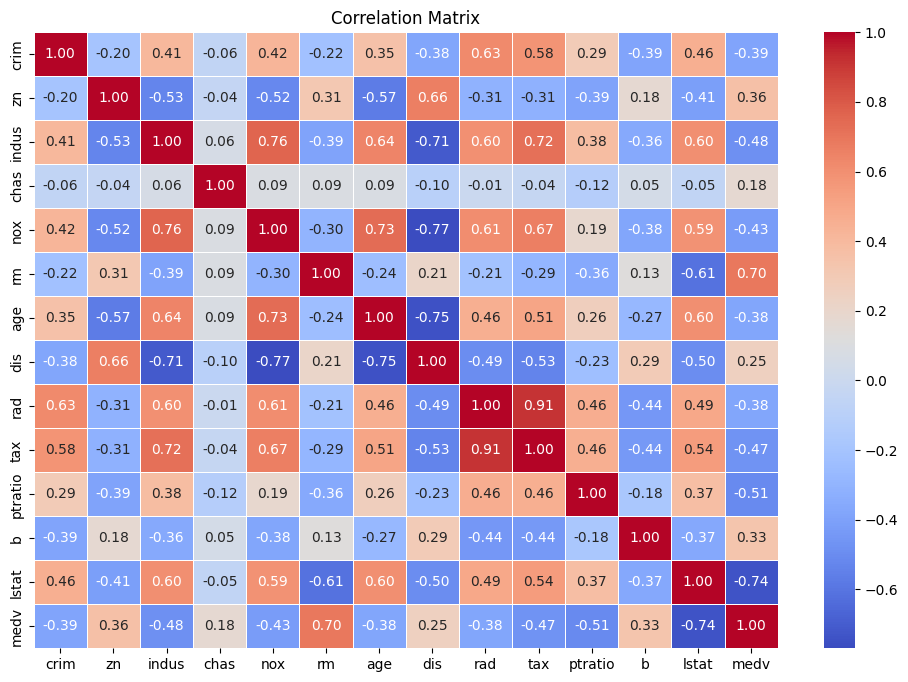

In [5]:
# Compute correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


### Use Feature Importance from a Model

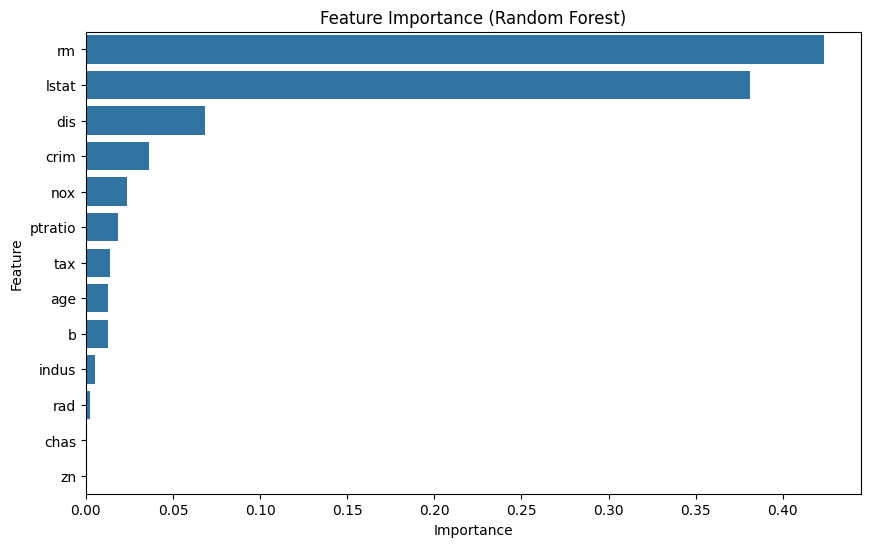

In [6]:
from sklearn.ensemble import RandomForestRegressor

# Define target and features
X = data.drop(columns=['medv'])  # All features except the target
y = data['medv']

# Train a Random Forest model to compute feature importance
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X, y)

# Get feature importance
feature_importances = model.feature_importances_

# Create a DataFrame to visualize feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()


### Select Features Based on Correlation and Importance

In [7]:
# Choose features that are highly correlated with target (medv) or are important
selected_features = ['crim', 'rm', 'tax', 'ptratio', 'lstat', 'indus', 'nox']

# Prepare data for the model
X_selected = data[selected_features]
y = data['medv']


### Train and Evaluate the Model with Selected Features

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=1)

# Train a Linear Regression model
model = LinearRegression().fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


R²: 0.6950
RMSE: 5.4906


### Linear Regression Model Training and Evaluation for Boston Housing Dataset

In [10]:
# Load the dataset
data = pd.read_csv('../data/bostonhousing.csv')

# Compute correlation matrix
corr_matrix = data.corr()

# Select features highly correlated with the target variable 'medv'
selected_features = [col for col in corr_matrix.columns if abs(corr_matrix[col]['medv']) > 0.5]

# Prepare data
X = data[selected_features].drop(columns=['medv'])
y = data['medv']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"Selected Features: {selected_features}")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

Selected Features: ['rm', 'ptratio', 'lstat', 'medv']
R²: 0.6959
RMSE: 5.4820


### Hyperparameter Tuning for Ridge Regression on Boston Housing Dataset

In [ ]:


# Load the dataset
data = pd.read_csv('../data/bostonhousing.csv')

# Compute correlation matrix
corr_matrix = data.corr()

# Select features highly correlated with the target variable 'medv'
selected_features = [col for col in corr_matrix.columns if abs(corr_matrix[col]['medv']) > 0.5]

# Prepare data
X = data[selected_features].drop(columns=['medv'])
y = data['medv']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize Ridge Regression model
ridge_model = Ridge()

# Define the parameter grid for hyperparameter tuning
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Initialize GridSearchCV to perform the tuning
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best model from the grid search
best_ridge_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_ridge_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


Best Hyperparameters: {'alpha': 1}
Best Cross-Validation Score: -27.1073
R²: 0.6952
RMSE: 5.4882
